# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Manuel

Apellidos: Sepúlveda Carvajal

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas (Grid de 4 graficas) y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [232]:
%pip install pandas seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [233]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Análisis descriptivos


In [234]:
data = pd.read_csv('housing_time_series_by_madrid_neighbourhood.csv')
print(data.head(3))

  neighbourhood_group        date  m2_price  inflation  HICP  \
0              Centro  2010-08-01      15.3        0.3   1.6   
1              Centro  2011-01-01      15.6       -0.7   3.0   
2              Centro  2011-02-01      15.4        0.1   3.4   

   population_density  listings_count  minimum_nights  nigth_price  \
0                 796               1             2.0        114.0   
1                 800               1             2.0        114.0   
2                 800               4             7.0        184.0   

   availability_365  listing_reviews  number_of_reviews  reviews_per_month  \
0            305.00                1              155.0             0.9000   
1            305.00                1              155.0             0.9000   
2             44.25                4              100.0             0.5925   

   hosts_count  Private_room  Entire_home  Hotel_room  Shared_room  
0            1             0            1           0            0  
1          

Transformar fecha a datetime para el uso correcto de la fecha

In [235]:
data['date'] = pd.to_datetime(data['date'])

1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?

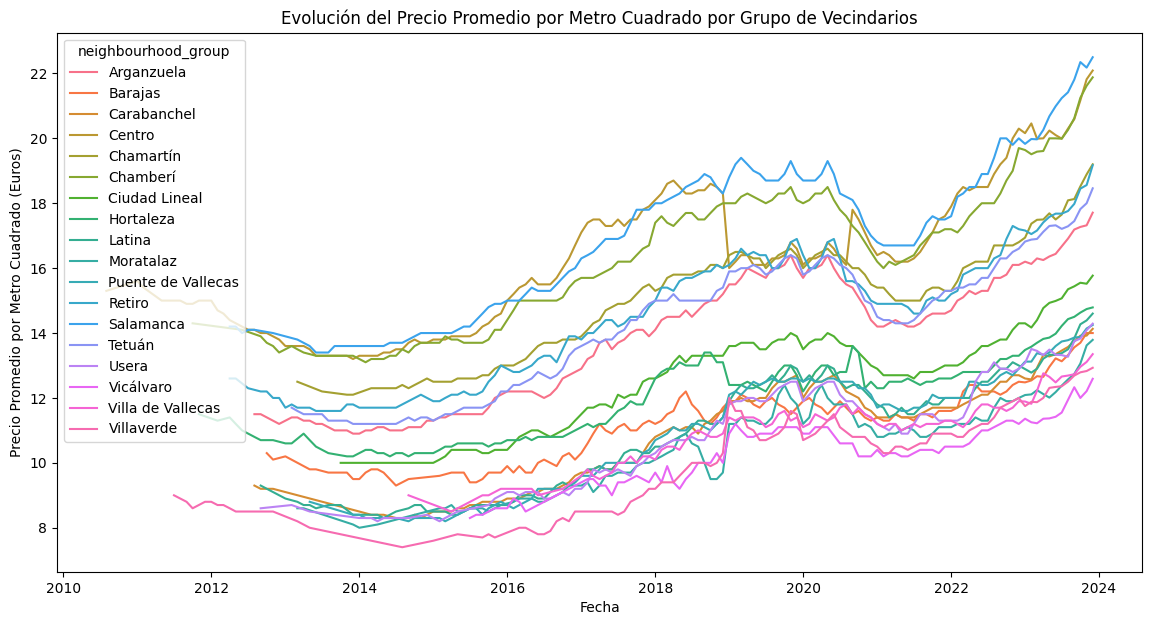

In [236]:
grouped_data = data.groupby(['neighbourhood_group', 'date'])['m2_price'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='m2_price', hue='neighbourhood_group', data=grouped_data)
plt.title('Evolución del Precio Promedio por Metro Cuadrado por Grupo de Vecindarios')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio por Metro Cuadrado (Euros)')
plt.show()

2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?

In [237]:
correlation = data['m2_price'].corr(data['population_density'])
print(f'Coeficiente de correlación: {correlation}')

Coeficiente de correlación: 0.4713674428403691


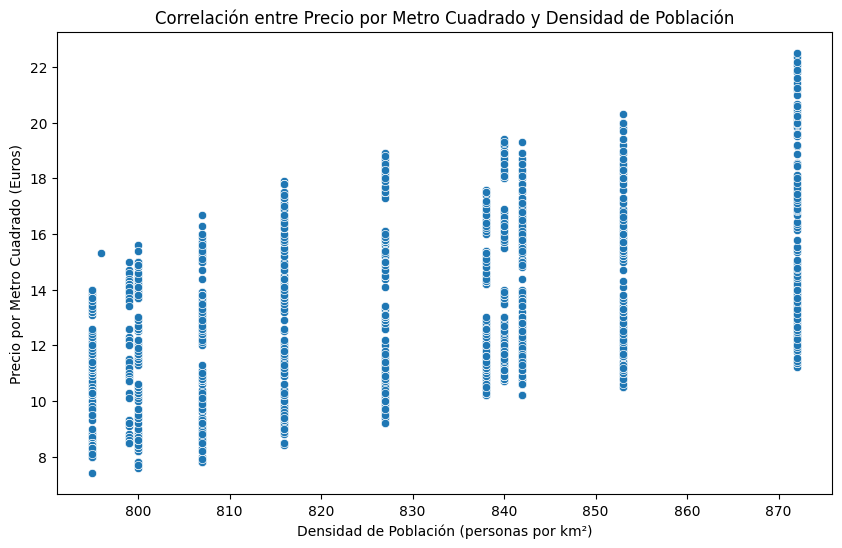

In [238]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population_density', y='m2_price', data=data)
plt.title('Correlación entre Precio por Metro Cuadrado y Densidad de Población')
plt.xlabel('Densidad de Población (personas por km²)')
plt.ylabel('Precio por Metro Cuadrado (Euros)')
plt.show()

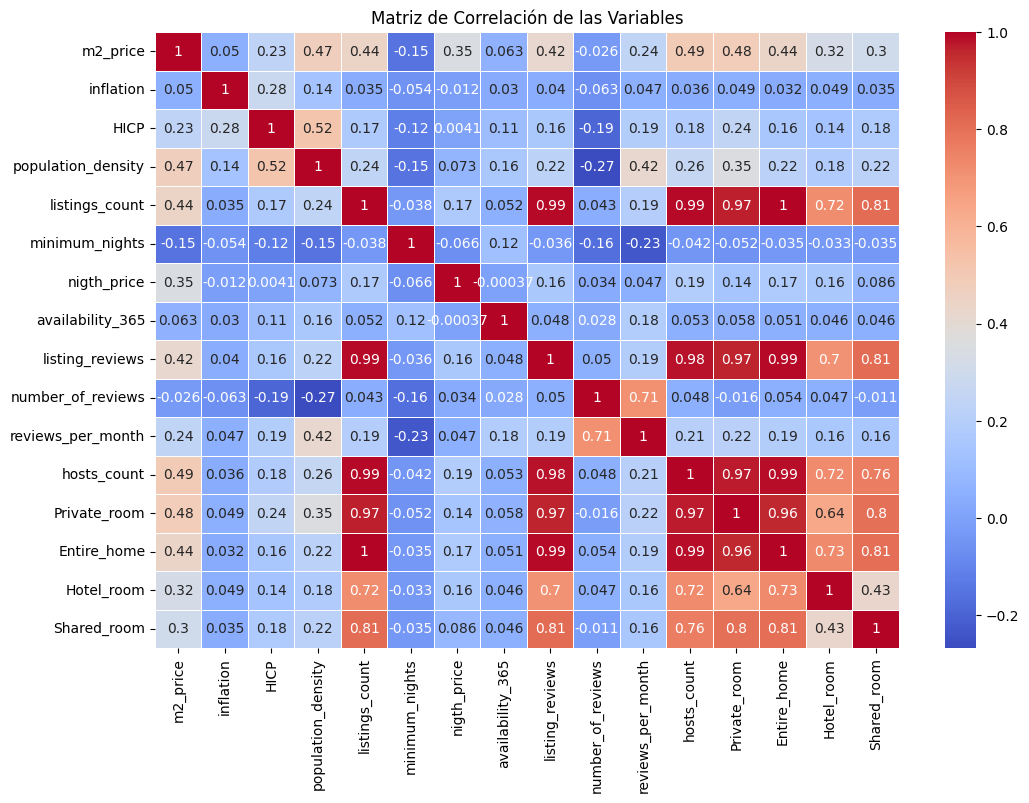

In [239]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables')
plt.show()

3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?

In [240]:
data['month'] = data['date'].dt.month
monthly_reviews = data.groupby('month')['reviews_per_month'].mean().reset_index()
monthly_availability = data.groupby('month')['availability_365'].mean().reset_index()

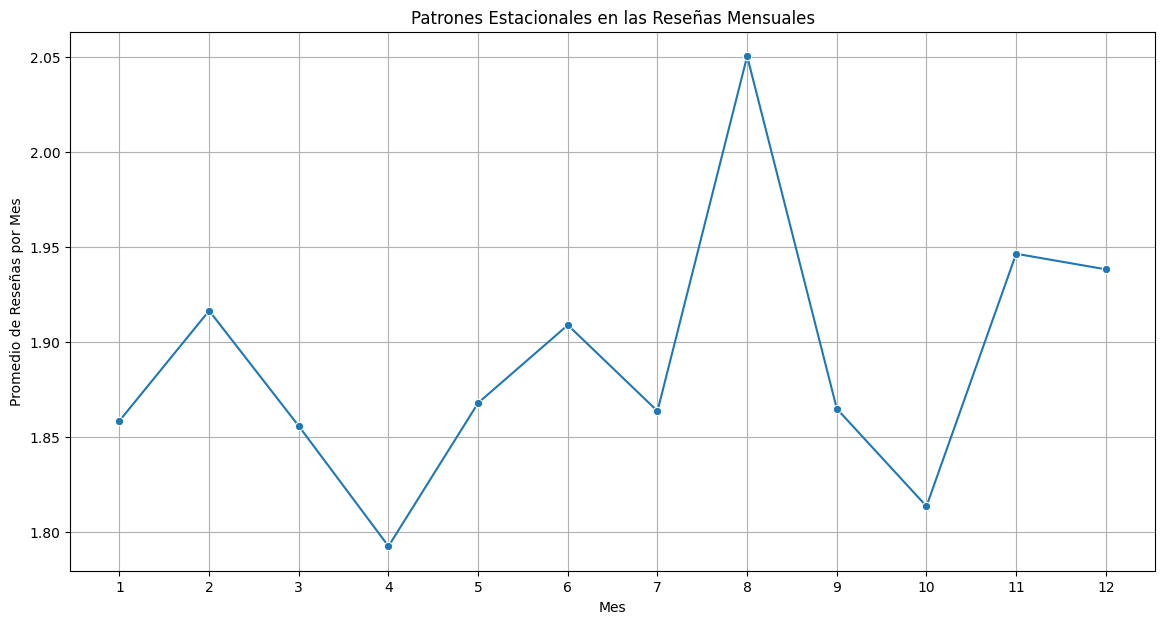

In [241]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='reviews_per_month', data=monthly_reviews, marker='o')
plt.title('Patrones Estacionales en las Reseñas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Promedio de Reseñas por Mes')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

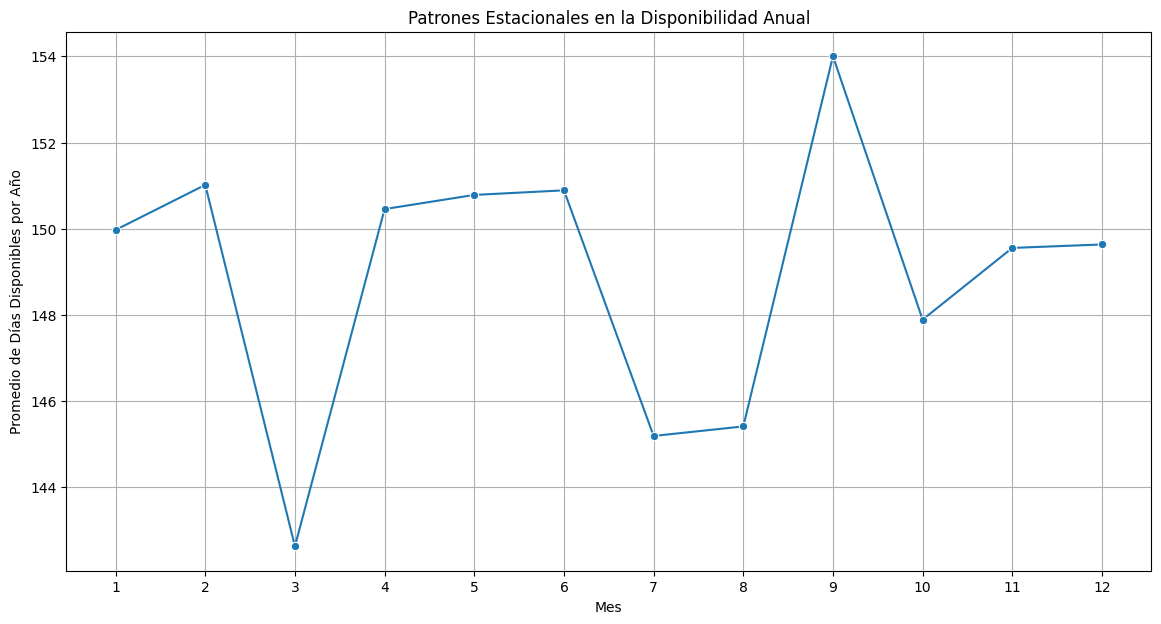

In [242]:

plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='availability_365', data=monthly_availability, marker='o')
plt.title('Patrones Estacionales en la Disponibilidad Anual')
plt.xlabel('Mes')
plt.ylabel('Promedio de Días Disponibles por Año')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?

In [243]:
top_hosts = data.groupby('neighbourhood_group')['hosts_count'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_hosts)

  neighbourhood_group  hosts_count
0              Centro        93731
1          Arganzuela        11183
2           Salamanca        10644
3            Chamberí         9053
4              Retiro         7563
5              Tetuán         7164
6       Ciudad Lineal         5349
7         Carabanchel         5124
8  Puente de Vallecas         4712
9              Latina         4570


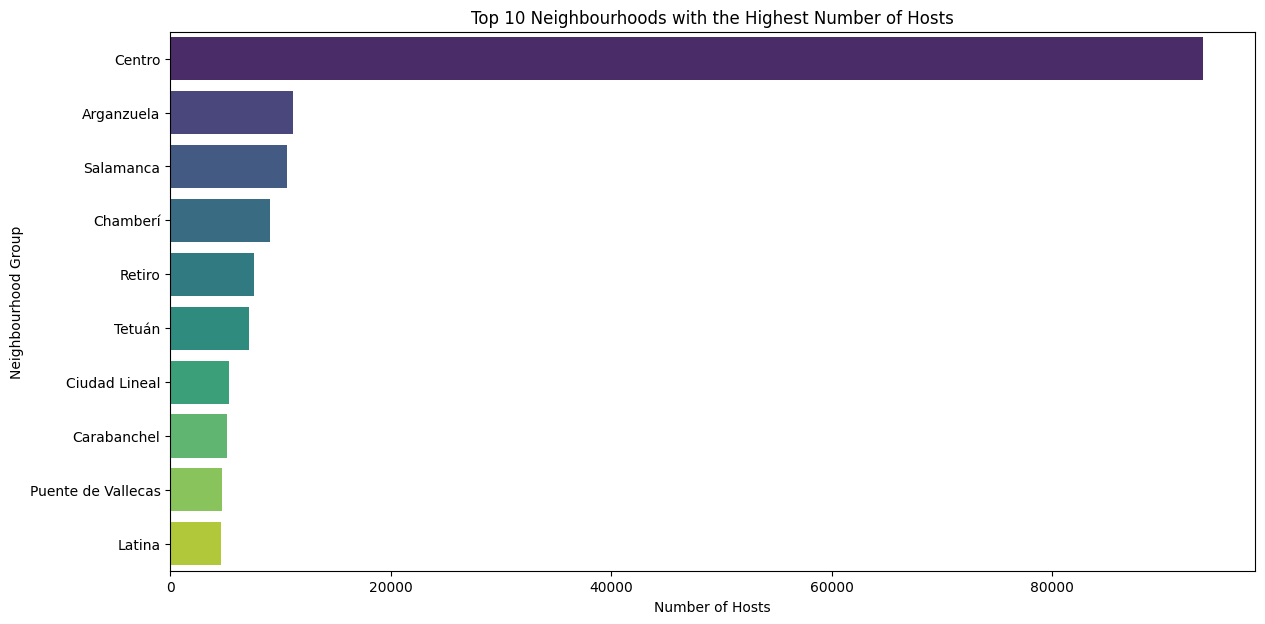

In [244]:
plt.figure(figsize=(14, 7))
sns.barplot(x='hosts_count', y='neighbourhood_group', data=top_hosts, palette='viridis', hue='neighbourhood_group')
plt.title('Top 10 Neighbourhoods with the Highest Number of Hosts')
plt.xlabel('Number of Hosts')
plt.ylabel('Neighbourhood Group')
plt.legend=False
plt.show()

In [245]:
grouped_data2 = data.groupby(['neighbourhood_group', 'hosts_count'])['m2_price'].mean().reset_index()

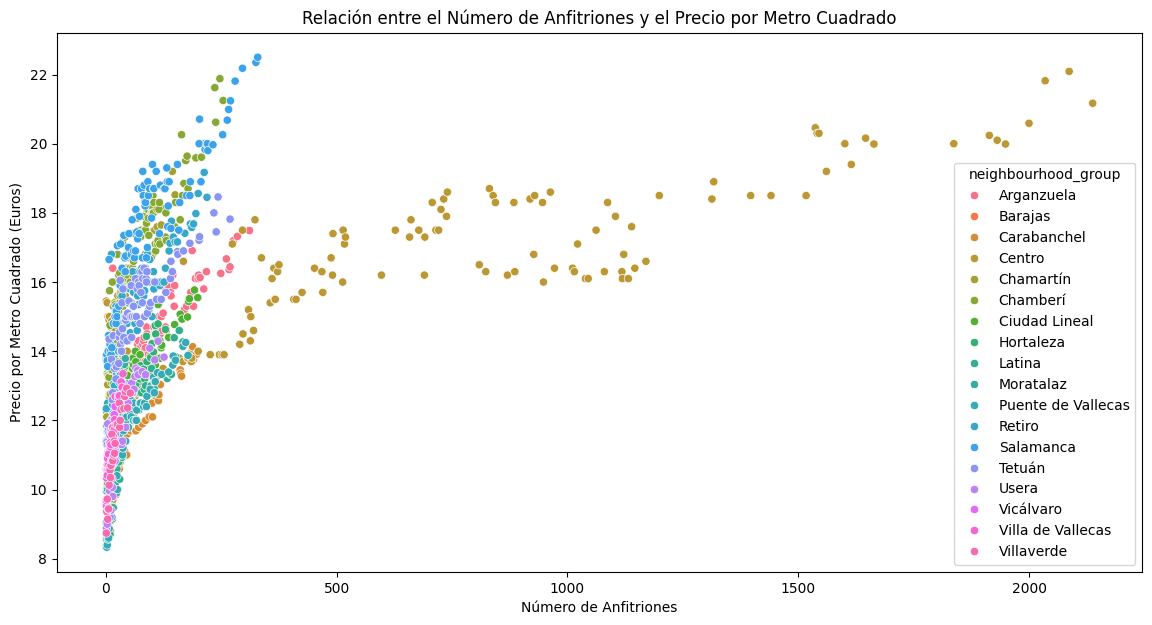

In [246]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='hosts_count', y='m2_price', hue='neighbourhood_group', data=grouped_data2)
plt.title('Relación entre el Número de Anfitriones y el Precio por Metro Cuadrado')
plt.xlabel('Número de Anfitriones')
plt.ylabel('Precio por Metro Cuadrado (Euros)')
plt.show()

5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?

In [247]:
data['year'] = data['date'].dt.year
annual_growth = data.groupby(['neighbourhood_group', 'year'])[['m2_price', 'nigth_price']].mean().reset_index()
annual_growth.head()

,neighbourhood_group,year,m2_price,nigth_price
0,Arganzuela,2012,11.400000,33.000000
1,Arganzuela,2013,11.163636,80.457576
2,Arganzuela,2014,11.058333,74.364012
3,Arganzuela,2015,11.575000,78.588997
4,Arganzuela,2016,12.300000,81.096825


In [248]:
annual_growth['m2_price_growth'] = annual_growth.groupby('neighbourhood_group')['m2_price'].pct_change() * 100
annual_growth['nigth_price_growth'] = annual_growth.groupby('neighbourhood_group')['nigth_price'].pct_change() * 100
top_m2_price_growth = annual_growth.sort_values(by='m2_price_growth', ascending=False).dropna()
top_nigth_price_growth = annual_growth.sort_values(by='nigth_price_growth', ascending=False).dropna()

print("Top 10 vecindarios con mayor crecimiento en precio por metro cuadrado:")
print(top_m2_price_growth[['neighbourhood_group', 'year', 'm2_price_growth']])

print("\nTop 10 vecindarios con mayor crecimiento en precio por noche:")
print(top_nigth_price_growth[['neighbourhood_group', 'year', 'nigth_price_growth']])

Top 10 vecindarios con mayor crecimiento en precio por metro cuadrado:
    neighbourhood_group  year  m2_price_growth
205          Villaverde  2019        15.042735
104              Latina  2019        13.916350
47               Centro  2022        13.370055
91            Hortaleza  2018        13.096961
115           Moratalaz  2019        13.061224
..                  ...   ...              ...
163              Tetuán  2021        -7.684211
9            Arganzuela  2021        -7.856761
200          Villaverde  2014        -8.641975
25          Carabanchel  2014        -9.304426
44               Centro  2019       -11.447964

[192 rows x 3 columns]

Top 10 vecindarios con mayor crecimiento en precio por noche:
    neighbourhood_group  year  nigth_price_growth
205          Villaverde  2019          435.915766
200          Villaverde  2014          250.000000
1            Arganzuela  2013          143.810836
26          Carabanchel  2015          106.182866
202          Villaverde  201

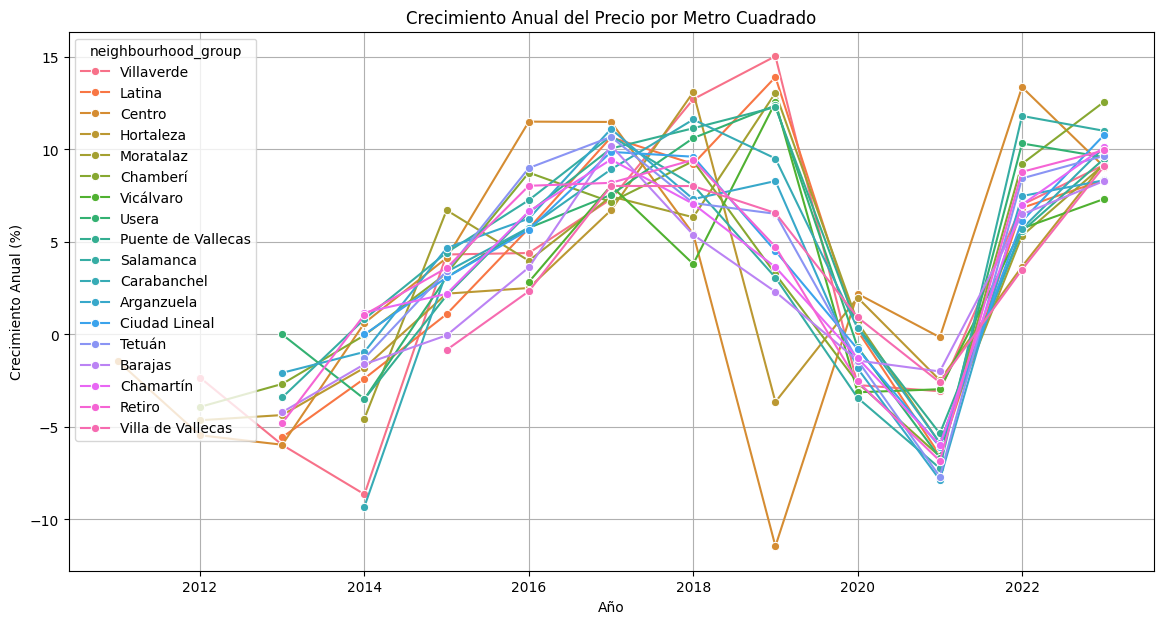

In [249]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='m2_price_growth', hue='neighbourhood_group', data=top_m2_price_growth, marker='o')
plt.title('Crecimiento Anual del Precio por Metro Cuadrado')
plt.xlabel('Año')
plt.ylabel('Crecimiento Anual (%)')
plt.grid(True)
plt.show()

6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

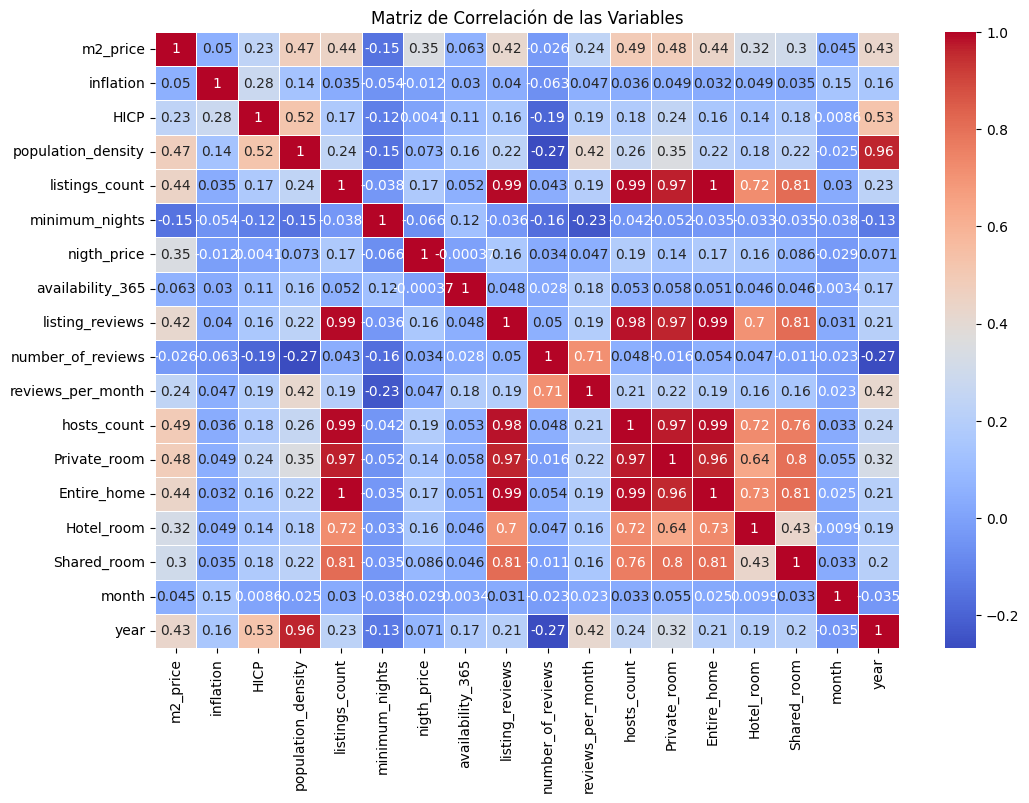

Correlación de las variables con m2_price:
m2_price              1.000000
hosts_count           0.492247
Private_room          0.480942
population_density    0.471367
listings_count        0.444429
Entire_home           0.435964
year                  0.427516
listing_reviews       0.418026
nigth_price           0.347200
Hotel_room            0.323102
Shared_room           0.304828
reviews_per_month     0.241542
HICP                  0.233299
availability_365      0.063401
inflation             0.049589
month                 0.044847
number_of_reviews    -0.025598
minimum_nights       -0.153499
Name: m2_price, dtype: float64


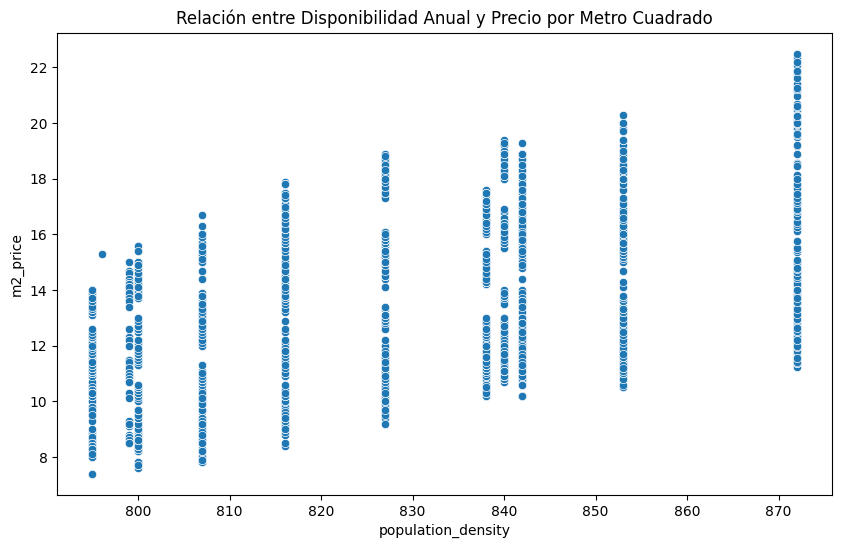

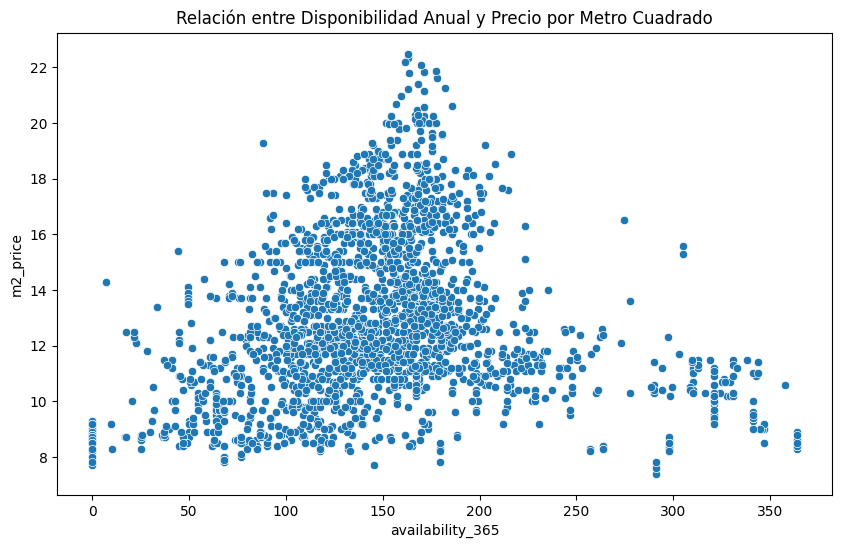

In [250]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables')
plt.show()

correlation_m2_price = correlation_matrix['m2_price'].sort_values(ascending=False)

print("Correlación de las variables con m2_price:")
print(correlation_m2_price)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='population_density', y='m2_price', data=data)
plt.title('Relación entre Disponibilidad Anual y Precio por Metro Cuadrado')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='m2_price', data=data)
plt.title('Relación entre Disponibilidad Anual y Precio por Metro Cuadrado')
plt.show()

# Modelo de Regresión Lineal

In [251]:
X = data[['listings_count', 'population_density', 'minimum_nights', 'nigth_price', 'availability_365', 'listing_reviews', 'number_of_reviews', 'reviews_per_month', 'hosts_count', 'Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']]
y = data['m2_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Coeficientes
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

# Evaluar
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')
print(f'Coeficiente de determinación R^2: {r2}')

                    Coeficiente
listings_count         0.006745
population_density     0.057206
minimum_nights        -0.011740
nigth_price            0.008301
availability_365       0.001288
listing_reviews       -0.002365
number_of_reviews      0.008413
reviews_per_month     -0.860975
hosts_count            0.038986
Private_room          -0.024706
Entire_home           -0.015218
Hotel_room            -0.101395
Shared_room            0.148064
Error cuadrático medio: 3.7030884360218272
Coeficiente de determinación R^2: 0.5651171807973061


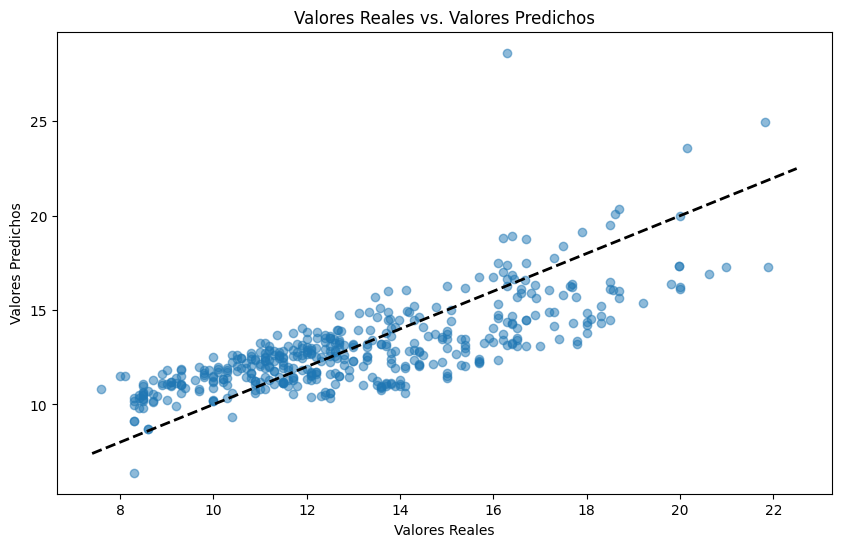

In [252]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

Precio promedio por metro cuadrado con inflación alta: 12.90
Precio promedio por metro cuadrado con inflación baja: 12.87
Diferencia promedio de precio: 0.03
Valor de t: 0.2663
Valor p: 0.7900
No se encontró una diferencia estadísticamente significativa en el precio promedio por metro cuadrado entre semanas con inflación alta y baja.


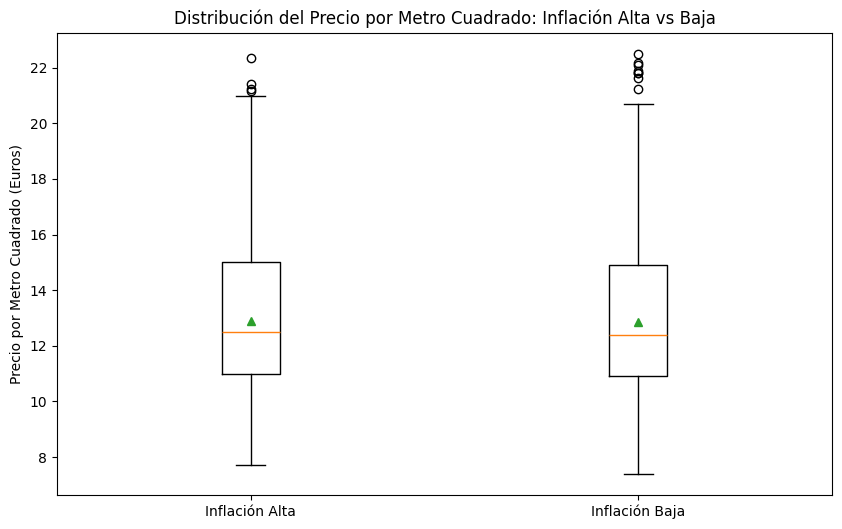

In [253]:
# Filtrar los datos por inflación alta y baja
inflacion_alta = data[data['inflation'] > data['inflation'].median()]['m2_price']
inflacion_baja = data[data['inflation'] <= data['inflation'].median()]['m2_price']

# Calcular las ventas promedio de semanas con inflación alta y baja
media_inflacion_alta = inflacion_alta.mean()
media_inflacion_baja = inflacion_baja.mean()

# Calcular la diferencia promedio de ventas entre semanas con inflación alta y baja
diferencia_promedio_inflacion = media_inflacion_alta - media_inflacion_baja

# Realizar la prueba t para determinar si la diferencia es estadísticamente significativa
t_stat_inflacion, p_value_inflacion = stats.ttest_ind(inflacion_alta, inflacion_baja, equal_var=False)

# Mostrar resultados
print(f"Precio promedio por metro cuadrado con inflación alta: {media_inflacion_alta:.2f}")
print(f"Precio promedio por metro cuadrado con inflación baja: {media_inflacion_baja:.2f}")
print(f"Diferencia promedio de precio: {diferencia_promedio_inflacion:.2f}")
print(f"Valor de t: {t_stat_inflacion:.4f}")
print(f"Valor p: {p_value_inflacion:.4f}")

# Evaluación de significancia
if p_value_inflacion < 0.05:
  print("La diferencia en el precio promedio por metro cuadrado es estadísticamente significativa (p < 0.05).")
else:
  print("No se encontró una diferencia estadísticamente significativa en el precio promedio por metro cuadrado entre semanas con inflación alta y baja.")

plt.figure(figsize=(10, 6))
plt.boxplot([inflacion_alta, inflacion_baja], tick_labels=['Inflación Alta', 'Inflación Baja'], showmeans=True)
plt.ylabel('Precio por Metro Cuadrado (Euros)')
plt.title('Distribución del Precio por Metro Cuadrado: Inflación Alta vs Baja')
plt.grid(False)
plt.show()

Precio promedio por metro cuadrado con alta densidad de población: 14.07
Precio promedio por metro cuadrado con baja densidad de población: 11.77
Diferencia promedio de precio: 2.29
Valor de t: 20.3083
Valor p: 0.0000
La diferencia en el precio promedio por metro cuadrado es estadísticamente significativa (p < 0.05).


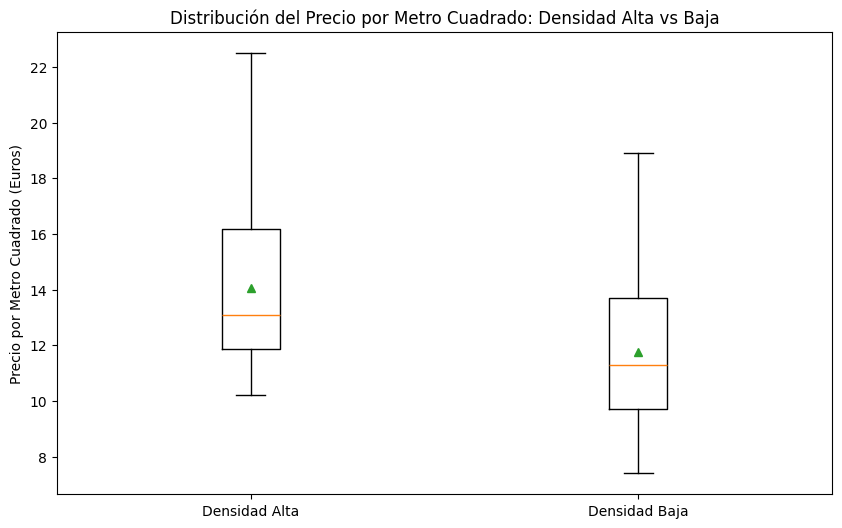

In [260]:
# Filtrar los datos por densidad de población alta y baja
densidad_alta = data[data['population_density'] > data['population_density'].median()]['m2_price']
densidad_baja = data[data['population_density'] <= data['population_density'].median()]['m2_price']

# Calcular el precio promedio por metro cuadrado en vecindarios con alta y baja densidad de población
media_densidad_alta = densidad_alta.mean()
media_densidad_baja = densidad_baja.mean()

# Calcular la diferencia promedio de precio entre vecindarios con alta y baja densidad de población
diferencia_promedio_densidad = media_densidad_alta - media_densidad_baja

# Realizar la prueba t para determinar si la diferencia es estadísticamente significativa
t_stat_densidad, p_value_densidad = stats.ttest_ind(densidad_alta, densidad_baja, equal_var=False)

# Mostrar resultados
print(f"Precio promedio por metro cuadrado con alta densidad de población: {media_densidad_alta:.2f}")
print(f"Precio promedio por metro cuadrado con baja densidad de población: {media_densidad_baja:.2f}")
print(f"Diferencia promedio de precio: {diferencia_promedio_densidad:.2f}")
print(f"Valor de t: {t_stat_densidad:.4f}")
print(f"Valor p: {p_value_densidad:.4f}")

# Evaluación de significancia
if p_value_densidad < 0.05:
  print("La diferencia en el precio promedio por metro cuadrado es estadísticamente significativa (p < 0.05).")
else:
  print("No se encontró una diferencia estadísticamente significativa en el precio promedio por metro cuadrado entre vecindarios con alta y baja densidad de población.")

# Crear el gráfico de caja (boxplot)
plt.figure(figsize=(10, 6))
plt.boxplot([densidad_alta, densidad_baja], tick_labels=['Densidad Alta', 'Densidad Baja'], showmeans=True)
plt.ylabel('Precio por Metro Cuadrado (Euros)')
plt.title('Distribución del Precio por Metro Cuadrado: Densidad Alta vs Baja')
plt.grid(False)
plt.show()

Precio promedio por metro cuadrado con alta disponibilidad anual: 13.49
Precio promedio por metro cuadrado con baja disponibilidad anual: 12.28
Diferencia promedio de precio: 1.21
Valor de t: 10.0510
Valor p: 0.0000
La diferencia en el precio promedio por metro cuadrado es estadísticamente significativa (p < 0.05).


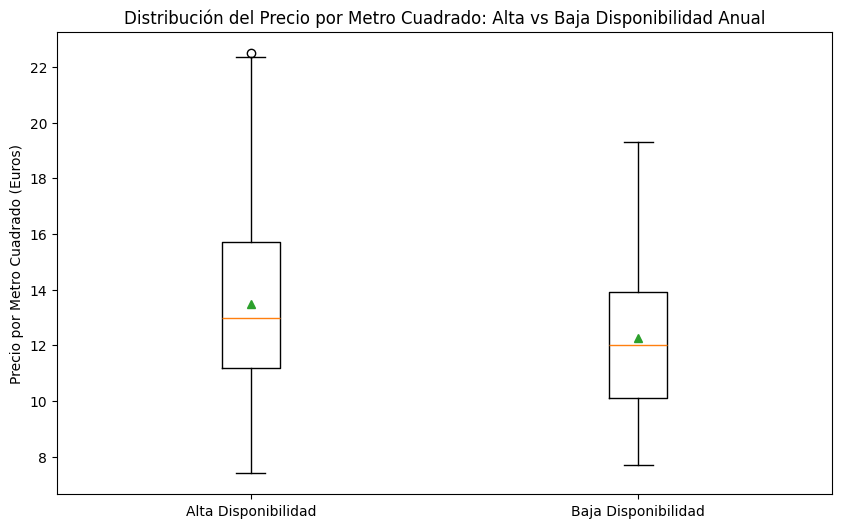

In [254]:
# Filtrar los datos por alta y baja disponibilidad anual
disponibilidad_alta = data[data['availability_365'] > data['availability_365'].median()]['m2_price']
disponibilidad_baja = data[data['availability_365'] <= data['availability_365'].median()]['m2_price']

# Calcular el precio promedio por metro cuadrado en vecindarios con alta y baja disponibilidad anual
media_disponibilidad_alta = disponibilidad_alta.mean()
media_disponibilidad_baja = disponibilidad_baja.mean()

# Calcular la diferencia promedio de precio entre vecindarios con alta y baja disponibilidad anual
diferencia_promedio_disponibilidad = media_disponibilidad_alta - media_disponibilidad_baja

# Realizar la prueba t para determinar si la diferencia es estadísticamente significativa
t_stat_disponibilidad, p_value_disponibilidad = stats.ttest_ind(disponibilidad_alta, disponibilidad_baja, equal_var=False)

# Mostrar resultados
print(f"Precio promedio por metro cuadrado con alta disponibilidad anual: {media_disponibilidad_alta:.2f}")
print(f"Precio promedio por metro cuadrado con baja disponibilidad anual: {media_disponibilidad_baja:.2f}")
print(f"Diferencia promedio de precio: {diferencia_promedio_disponibilidad:.2f}")
print(f"Valor de t: {t_stat_disponibilidad:.4f}")
print(f"Valor p: {p_value_disponibilidad:.4f}")

# Evaluación de significancia
if p_value_disponibilidad < 0.05:
  print("La diferencia en el precio promedio por metro cuadrado es estadísticamente significativa (p < 0.05).")
else:
  print("No se encontró una diferencia estadísticamente significativa en el precio promedio por metro cuadrado entre vecindarios con alta y baja disponibilidad anual.")

# Crear el gráfico de caja (boxplot)
plt.figure(figsize=(10, 6))
plt.boxplot([disponibilidad_alta, disponibilidad_baja], tick_labels=['Alta Disponibilidad', 'Baja Disponibilidad'], showmeans=True)
plt.ylabel('Precio por Metro Cuadrado (Euros)')
plt.title('Distribución del Precio por Metro Cuadrado: Alta vs Baja Disponibilidad Anual')
plt.grid(False)
plt.show()

Precio promedio por metro cuadrado con alta cantidad de anfitriones: 14.79
Precio promedio por metro cuadrado con baja cantidad de anfitriones: 11.02
Diferencia promedio de precio: 3.77
Valor de t: 40.3774
Valor p: 0.0000
La diferencia en el precio promedio por metro cuadrado es estadísticamente significativa (p < 0.05).


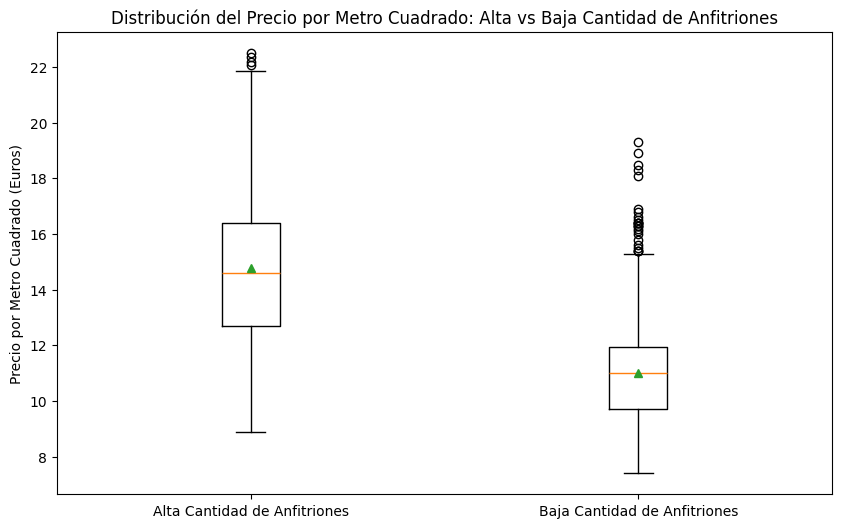

In [255]:
# Filtrar los datos por alta y baja cantidad de anfitriones
anfitriones_altos = data[data['hosts_count'] > data['hosts_count'].median()]['m2_price']
anfitriones_bajos = data[data['hosts_count'] <= data['hosts_count'].median()]['m2_price']

# Calcular el precio promedio por metro cuadrado en vecindarios con alta y baja cantidad de anfitriones
media_anfitriones_altos = anfitriones_altos.mean()
media_anfitriones_bajos = anfitriones_bajos.mean()

# Calcular la diferencia promedio de precio entre vecindarios con alta y baja cantidad de anfitriones
diferencia_promedio_anfitriones = media_anfitriones_altos - media_anfitriones_bajos

# Realizar la prueba t para determinar si la diferencia es estadísticamente significativa
t_stat_anfitriones, p_value_anfitriones = stats.ttest_ind(anfitriones_altos, anfitriones_bajos, equal_var=False)

# Mostrar resultados
print(f"Precio promedio por metro cuadrado con alta cantidad de anfitriones: {media_anfitriones_altos:.2f}")
print(f"Precio promedio por metro cuadrado con baja cantidad de anfitriones: {media_anfitriones_bajos:.2f}")
print(f"Diferencia promedio de precio: {diferencia_promedio_anfitriones:.2f}")
print(f"Valor de t: {t_stat_anfitriones:.4f}")
print(f"Valor p: {p_value_anfitriones:.4f}")

# Evaluación de significancia
if p_value_anfitriones < 0.05:
  print("La diferencia en el precio promedio por metro cuadrado es estadísticamente significativa (p < 0.05).")
else:
  print("No se encontró una diferencia estadísticamente significativa en el precio promedio por metro cuadrado entre vecindarios con alta y baja cantidad de anfitriones.")

# Crear el gráfico de caja (boxplot)
plt.figure(figsize=(10, 6))
plt.boxplot([anfitriones_altos, anfitriones_bajos], tick_labels=['Alta Cantidad de Anfitriones', 'Baja Cantidad de Anfitriones'], showmeans=True)
plt.ylabel('Precio por Metro Cuadrado (Euros)')
plt.title('Distribución del Precio por Metro Cuadrado: Alta vs Baja Cantidad de Anfitriones')
plt.grid(False)
plt.show()

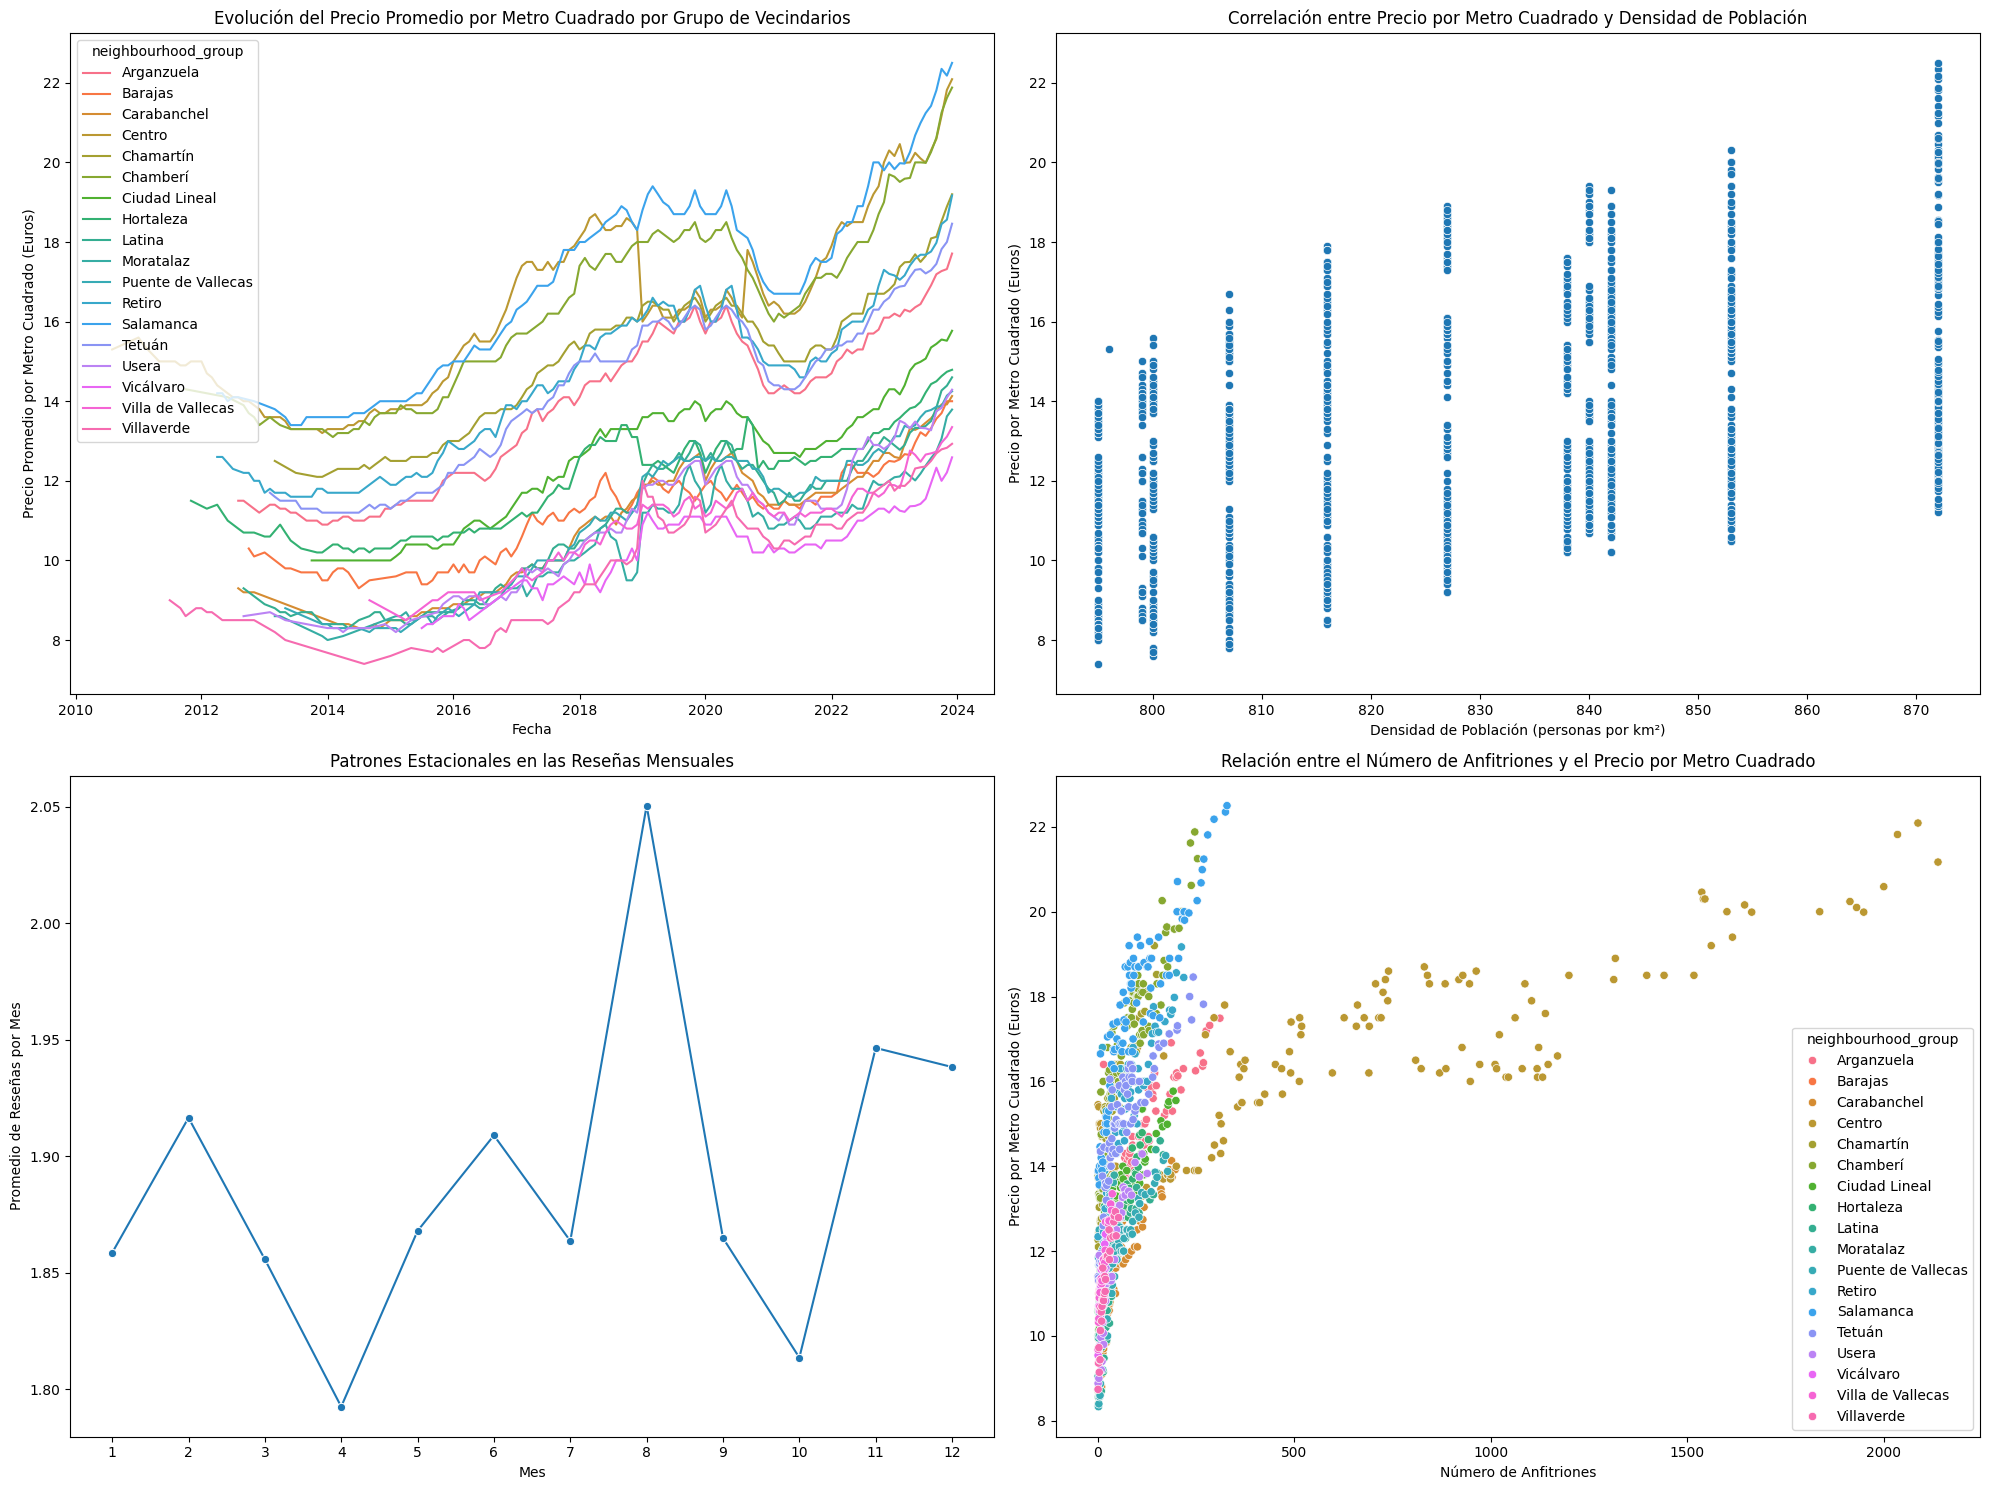

In [258]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Gráfico 1
sns.lineplot(x='date', y='m2_price', hue='neighbourhood_group', data=grouped_data, ax=axs[0, 0])
axs[0, 0].set_title('Evolución del Precio Promedio por Metro Cuadrado por Grupo de Vecindarios')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Precio Promedio por Metro Cuadrado (Euros)')

# Gráfico 2
sns.scatterplot(x='population_density', y='m2_price', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Correlación entre Precio por Metro Cuadrado y Densidad de Población')
axs[0, 1].set_xlabel('Densidad de Población (personas por km²)')
axs[0, 1].set_ylabel('Precio por Metro Cuadrado (Euros)')

# Gráfico 3
sns.lineplot(x='month', y='reviews_per_month', data=monthly_reviews, marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Patrones Estacionales en las Reseñas Mensuales')
axs[1, 0].set_xlabel('Mes')
axs[1, 0].set_ylabel('Promedio de Reseñas por Mes')
axs[1, 0].set_xticks(range(1, 13))

# Gráfico 4
sns.scatterplot(x='hosts_count', y='m2_price', hue='neighbourhood_group', data=grouped_data2, ax=axs[1, 1])
axs[1, 1].set_title('Relación entre el Número de Anfitriones y el Precio por Metro Cuadrado')
axs[1, 1].set_xlabel('Número de Anfitriones')
axs[1, 1].set_ylabel('Precio por Metro Cuadrado (Euros)')

plt.tight_layout()
plt.show()